# CNN implementation

## Load functions


In [114]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Load dataset

In [134]:
from google.colab import drive
import os
import cv2
from skimage.transform import rescale
drive.mount('/content/drive')

def load_images(path, label):
  img_arr = []
  for filename in os.listdir(path):
    # We only need to keep 1 color channel, since the images have been grayscaled
    img = cv2.imread(path + filename)[:,:,0]

    # Downscale since we keep running out of RAM
    img = rescale(img, 0.50, anti_aliasing=True)

    # Data is formatted as [image,label]
    img_arr.append([img,label]) 
  return img_arr

train_path = '/content/drive/MyDrive/ML Final Project/ML Final Project Data/Processed/Train/'
val_path = '/content/drive/MyDrive/ML Final Project/ML Final Project Data/Processed/Val/'
test_path = '/content/drive/MyDrive/ML Final Project/ML Final Project Data/Processed/Test/'

train_waffles_path = train_path + 'waffles/'
train_sushi_path = train_path + 'sushi/'
train_wild_path = train_path + 'wild/'
train_cat_path = train_path + 'cat/'
train_takoyaki_path = train_path + 'takoyaki/'
train_tacos_path = train_path + 'tacos/'
train_faces_path = train_path + 'faces/'
train_tiramisu_path = train_path + 'tiramisu/'
train_tuna_tartare_path = train_path + 'tuna_tartare/'
train_dog_path = train_path + 'dog/'

val_waffles_path = val_path + 'waffles/'
val_sushi_path = val_path + 'sushi/'
val_wild_path = val_path + 'wild/'
val_cat_path = val_path + 'cat/'
val_takoyaki_path = val_path + 'takoyaki/'
val_tacos_path = val_path + 'tacos/'
val_faces_path = val_path + 'faces/'
val_tiramisu_path = val_path + 'tiramisu/'
val_tuna_tartare_path = val_path + 'tuna_tartare/'
val_dog_path = val_path + 'dog/'

test_waffles_path = test_path + 'waffles/'
test_sushi_path = test_path + 'sushi/'
test_wild_path = test_path + 'wild/'
test_cat_path = test_path + 'cat/'
test_takoyaki_path = test_path + 'takoyaki/'
test_tacos_path = test_path + 'tacos/'
test_faces_path = test_path + 'faces/'
test_tiramisu_path = test_path + 'tiramisu/'
test_tuna_tartare_path = test_path + 'tuna_tartare/'
test_dog_path = test_path + 'dog/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
# Pass in a label as well:
# Waffles - 0
# Sushi - 1
# Wild - 2
# Cat - 3
# Takoyaki - 4
# Tacos - 5
# Faces - 6
# Tiramisu - 7
# Tuna Tartare - 8
# Dog - 9
waffles_dat = load_images(train_waffles_path, 0)
sushi_dat = load_images(train_sushi_path, 1)
wild_dat = load_images(train_wild_path, 2)
cat_dat = load_images(train_cat_path, 3)
takoyaki_dat = load_images(train_takoyaki_path, 4)
tacos_dat = load_images(train_tacos_path, 5)
faces_dat = load_images(train_faces_path, 6)
tiramisu_dat = load_images(train_tiramisu_path, 7)
tuna_tartare_dat = load_images(train_tuna_tartare_path, 8)
dog_dat = load_images(train_dog_path, 9)


In [136]:
# convert to np.array
waffles_dat = np.array(waffles_dat)
sushi_dat = np.array(sushi_dat)
wild_dat = np.array(wild_dat)
cat_dat = np.array(cat_dat)
takoyaki_dat = np.array(takoyaki_dat)
tacos_dat = np.array(tacos_dat)
faces_dat = np.array(faces_dat)
tiramisu_dat = np.array(tiramisu_dat)
tuna_tartare_dat = np.array(tuna_tartare_dat)
dog_dat = np.array(dog_dat)

# concatenate train data
all_data = np.concatenate((waffles_dat, sushi_dat, wild_dat, cat_dat, takoyaki_dat, tacos_dat, faces_dat, tiramisu_dat, tuna_tartare_dat, dog_dat))
# Shuffle the data
np.random.shuffle(all_data)
# Split images and labels apart
xtrain = all_data[:,0]
ytrain = all_data[:,1]

In [137]:
# Pass in a label as well:
# Waffles - 0
# Sushi - 1
# Wild - 2
# Cat - 3
# Takoyaki - 4
# Tacos - 5
# Faces - 6
# Tiramisu - 7
# Tuna Tartare - 8
# Dog - 9
waffles_val = load_images(val_waffles_path, 0)
sushi_val = load_images(val_sushi_path, 1)
wild_val = load_images(val_wild_path, 2)
cat_val = load_images(val_cat_path, 3)
takoyaki_val = load_images(val_takoyaki_path, 4)
tacos_val = load_images(val_tacos_path, 5)
faces_val = load_images(val_faces_path, 6)
tiramisu_val = load_images(val_tiramisu_path, 7)
tuna_tartare_val = load_images(val_tuna_tartare_path, 8)
dog_val = load_images(val_dog_path, 9)


In [138]:
# convert to np.array
waffles_val = np.array(waffles_val)
sushi_val = np.array(sushi_val)
wild_val = np.array(wild_val)
cat_val = np.array(cat_val)
takoyaki_val = np.array(takoyaki_val)
tacos_val = np.array(tacos_val)
faces_val = np.array(faces_val)
tiramisu_val = np.array(tiramisu_val)
tuna_tartare_val = np.array(tuna_tartare_val)
dog_val = np.array(dog_val)

# concatenate train data
all_data = np.concatenate((waffles_val, sushi_val, wild_val, cat_val, takoyaki_val, tacos_val, faces_val, tiramisu_val, tuna_tartare_val, dog_val))
# Shuffle the data
np.random.shuffle(all_data)
# Split images and labels apart
xval = all_data[:,0]
yval = all_data[:,1]

In [139]:
# Pass in a label as well:
# Waffles - 0
# Sushi - 1
# Wild - 2
# Cat - 3
# Takoyaki - 4
# Tacos - 5
# Faces - 6
# Tiramisu - 7
# Tuna Tartare - 8
# Dog - 9
waffles_test = load_images(test_waffles_path, 0)
sushi_test = load_images(test_sushi_path, 1)
wild_test = load_images(test_wild_path, 2)
cat_test = load_images(test_cat_path, 3)
takoyaki_test = load_images(test_takoyaki_path, 4)
tacos_test = load_images(test_tacos_path, 5)
faces_test = load_images(test_faces_path, 6)
tiramisu_test = load_images(test_tiramisu_path, 7)
tuna_tartare_test = load_images(test_tuna_tartare_path, 8)
dog_test = load_images(test_dog_path, 9)

In [140]:
# convert to np.array
waffles_test = np.array(waffles_test)
sushi_test = np.array(sushi_test)
wild_test = np.array(wild_test)
cat_test = np.array(cat_test)
takoyaki_test = np.array(takoyaki_test)
tacos_test = np.array(tacos_test)
faces_test = np.array(faces_test)
tiramisu_test = np.array(tiramisu_test)
tuna_tartare_test = np.array(tuna_tartare_test)
dog_test = np.array(dog_test)

# concatenate train data
all_data = np.concatenate((waffles_test, sushi_test, wild_test, cat_test, takoyaki_test, tacos_test, faces_test, tiramisu_test, tuna_tartare_test, dog_test))
# Shuffle the data
np.random.shuffle(all_data)
# Split images and labels apart
xtest = all_data[:,0]
ytest = all_data[:,1]

## Define Model

In [159]:
class BestNN(torch.nn.Module):
    def __init__(self):
        super(BestNN, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.bn1 = torch.nn.BatchNorm2d(16)
        self.conv2 = torch.nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.bn2 = torch.nn.BatchNorm2d(32)
        self.conv3 = torch.nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn3 = torch.nn.BatchNorm2d(64)
        self.conv4 = torch.nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn4 = torch.nn.BatchNorm2d(128)
        self.linear1 = torch.nn.Linear(128*4*4, 256) # change this
        self.linear2 = torch.nn.Linear(256, 512)
        self.linear3 = torch.nn.Linear(512, 10)

    def forward(self, x):
        # print(x.size())
        x = x.view(x.size(0), 1, 64, 64)

        x = self.conv1(x)
        # x = self.bn1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.bn1(x)
        # x = F.dropout(x, p=0.4)

        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.bn2(x)

        x = self.conv3(x)
        #x = self.bn3(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.bn3(x)
        x = F.dropout(x, p=0.4)

        x = self.conv4(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.bn4(x)

        # print(x.size())
        x = x.view(x.size(0), -1)
        x = F.dropout(x, p=0.4)

        x = self.linear1(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.4)
 
        x = self.linear2(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.4)

        x = self.linear3(x)
        return x

## Train Model

In [ ]:
def approx_train_acc_and_loss(model, train_data, train_labels):
    idxs = np.random.choice(len(train_data), 200, replace=False)
    inputs = []
    for j in idxs:
      inputs.append(torch.from_numpy(xtrain[j].astype(np.float32)))
    x = torch.stack(inputs)
    y = torch.from_numpy(train_labels[idxs].astype(np.int))
    logits = model(x)
    loss = F.cross_entropy(logits, y)
    y_pred = torch.max(logits, 1)[1]
    return accuracy(train_labels[idxs], y_pred.numpy()), loss.item()


def dev_acc_and_loss(model, dev_data, dev_labels):
    inputs = []
    for i in range(dev_data.shape[0]):
      inputs.append(torch.from_numpy(dev_data[i].astype(np.float32)))
    x = torch.stack(inputs)
    y = torch.from_numpy(dev_labels.astype(np.int))
    logits = model(x)
    loss = F.cross_entropy(logits, y)
    y_pred = torch.max(logits, 1)[1]
    return accuracy(dev_labels, y_pred.numpy()), loss.item()


def accuracy(y, y_hat):
    return (y == y_hat).astype(np.float).mean()

In [160]:
learning_rate = 0.01
train_steps = 2000
batch_size = 40
model = BestNN()

trainAcc = []
devAcc = []
trainLoss = []
devLoss = []

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# TODO: You can change this loop as you need to, to optimize your training!
# for example, if you wanted to implement early stopping to make sure you
# don't overfit your model, you would do so in this loop.
for step in range(train_steps):
    # run the model and backprop for train steps
    i = np.random.choice(xtrain.shape[0], size=batch_size, replace=False)
    inputs = []
    for j in i:
      inputs.append(torch.from_numpy(xtrain[j].astype(np.float32)))
    x = torch.stack(inputs)
    y = torch.from_numpy(ytrain[i].astype(np.int))

    # Forward pass: Get logits for x
    logits = model(x)
    # Compute loss
    loss = F.cross_entropy(logits, y)
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # every 100 steps, log metrics
    if step % 100 == 0:
        train_acc, train_loss = approx_train_acc_and_loss(model,
                                                          xtrain,
                                                          ytrain)
        dev_acc, dev_loss = dev_acc_and_loss(model, xval, yval)

        step_metrics = {
            'step': step, 
            'train_loss': loss.item(), 
            'train_acc': train_acc,
            'dev_loss': dev_loss,
            'dev_acc': dev_acc
        }

        trainAcc.append(train_acc)
        trainLoss.append(train_loss)
        devAcc.append(dev_acc)
        devLoss.append(dev_loss)

        print(f'On step {step}: Train loss {train_loss} | Dev acc is {dev_acc}')

On step 0: Train loss 2.324629068374634 | Dev acc is 0.09644444444444444
On step 100: Train loss 1.5865333080291748 | Dev acc is 0.3382222222222222
On step 200: Train loss 1.4880070686340332 | Dev acc is 0.404
On step 300: Train loss 1.0917891263961792 | Dev acc is 0.4328888888888889
On step 400: Train loss 1.1710842847824097 | Dev acc is 0.5066666666666667
On step 500: Train loss 1.156826138496399 | Dev acc is 0.5
On step 600: Train loss 1.3085063695907593 | Dev acc is 0.48977777777777776
On step 700: Train loss 1.2201414108276367 | Dev acc is 0.5035555555555555
On step 800: Train loss 1.0659621953964233 | Dev acc is 0.5195555555555555
On step 900: Train loss 0.8978993892669678 | Dev acc is 0.5253333333333333
On step 1000: Train loss 0.9183387756347656 | Dev acc is 0.5524444444444444
On step 1100: Train loss 0.9534851312637329 | Dev acc is 0.5471111111111111
On step 1200: Train loss 0.842286229133606 | Dev acc is 0.5324444444444445
On step 1300: Train loss 0.8157423138618469 | Dev acc

In [161]:
fname = "/content/drive/MyDrive/ML Final Project/models/cnn_model_ds.model"
pickle.dump(model, open(fname, "wb"))

In [162]:
loaded_cnn = pickle.load(open(fname, "rb"))

## Test Model

In [163]:
model_trained = loaded_cnn

test_acc, test_loss = dev_acc_and_loss(model_trained, xtest, ytest)

print(test_acc)
print(test_loss)

0.587
1.1928808689117432


### Analysis


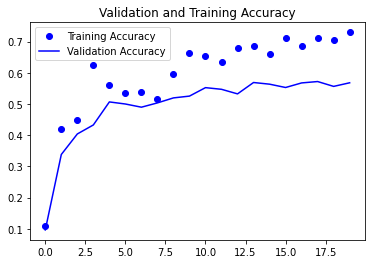

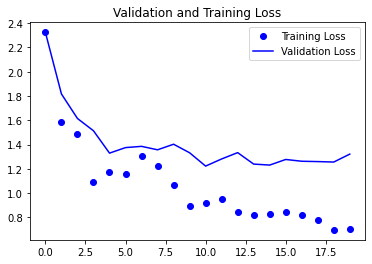

In [164]:
length = range(len(trainAcc))
plt.plot(length, trainAcc, 'bo', label='Training Accuracy')
plt.plot(length, devAcc, 'b', label='Validation Accuracy')
plt.title('Validation and Training Accuracy')
plt.legend()
plt.figure()
plt.plot(length, trainLoss, 'bo', label='Training Loss')
plt.plot(length, devLoss, 'b', label='Validation Loss')
plt.title('Validation and Training Loss')
plt.legend()
plt.show()